In [1]:

from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import ConstraintBasedEstimator
from pgmpy.estimators import K2Score, BicScore, MLE
import networkx as nx
import matplotlib.pyplot as plt
import graphviz
import pandas as pd
import torch
import pyro
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/wwymak/anaconda3/envs/immo-ml/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


reconstruct graph

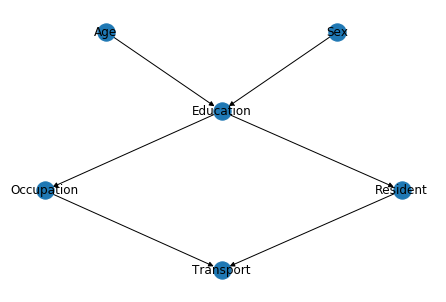

In [3]:
transport_model = BayesianModel([('Age', 'Education'), 
                                 ('Sex', 'Education'),
                                 ('Education', 'Occupation'),
                                 ('Education', 'Resident'),
                                 ('Occupation', 'Transport'),
                                 ('Resident', 'Transport')
                                ])

nx.draw(transport_model, nx.nx_pydot.graphviz_layout(transport_model, prog='dot'), with_labels=True)


In [6]:
data = pd.read_csv('survey.txt', sep=" ")
data = data.rename(columns={"A": "Age", "R": "Resident", "E": "Education",  "O":"Occupation",
                            "S": "Sex", "T" :"Transport"})

transport_model = BayesianModel([('Age', 'Education'), 
                                 ('Sex', 'Education'),
                                 ('Education', 'Occupation'),
                                 ('Education', 'Resident'),
                                 ('Occupation', 'Transport'),
                                 ('Resident', 'Transport')
                                ])
transport_model.fit(data, estimator=BayesianEstimator)

In [7]:
transport_model.get_independencies()

(Age _|_ Sex)
(Age _|_ Resident, Occupation, Transport | Education)
(Age _|_ Resident, Occupation | Transport, Education)
(Age _|_ Resident, Occupation, Transport | Sex, Education)
(Age _|_ Resident, Transport | Occupation, Education)
(Age _|_ Occupation, Transport | Resident, Education)
(Age _|_ Transport | Resident, Occupation)
(Age _|_ Resident, Occupation | Sex, Transport, Education)
(Age _|_ Resident | Occupation, Transport, Education)
(Age _|_ Occupation | Resident, Transport, Education)
(Age _|_ Resident, Transport | Sex, Occupation, Education)
(Age _|_ Occupation, Transport | Sex, Resident, Education)
(Age _|_ Transport | Resident, Occupation, Education)
(Age _|_ Transport | Resident, Occupation, Sex)
(Age _|_ Resident | Sex, Occupation, Transport, Education)
(Age _|_ Occupation | Sex, Resident, Transport, Education)
(Age _|_ Transport | Sex, Resident, Occupation, Education)
(Education _|_ Transport | Resident, Occupation)
(Education _|_ Transport | Occupation, Age, Resident)
(

In [8]:
transport_model.__dir__()

['graph_attr_dict_factory',
 'node_dict_factory',
 'node_attr_dict_factory',
 'adjlist_outer_dict_factory',
 'adjlist_inner_dict_factory',
 'edge_attr_dict_factory',
 'graph',
 '_node',
 '_adj',
 '_pred',
 '_succ',
 'nodes',
 'cpds',
 'cardinalities',
 '__module__',
 '__doc__',
 '__init__',
 'add_edge',
 'remove_node',
 'remove_nodes_from',
 'add_cpds',
 'get_cpds',
 'remove_cpds',
 'get_cardinality',
 'check_model',
 'to_markov_model',
 'to_junction_tree',
 'fit',
 'predict',
 'predict_probability',
 'get_factorized_product',
 'is_imap',
 'copy',
 'get_markov_blanket',
 'add_node',
 'add_nodes_from',
 'add_edges_from',
 'get_parents',
 'moralize',
 'get_leaves',
 'out_degree_iter',
 'in_degree_iter',
 'get_roots',
 'get_children',
 'get_independencies',
 'local_independencies',
 'is_iequivalent',
 'get_immoralities',
 'is_active_trail',
 'active_trail_nodes',
 '_get_ancestors_of',
 'do',
 'adj',
 'succ',
 'pred',
 'remove_edge',
 'remove_edges_from',
 'has_successor',
 'has_predecesso

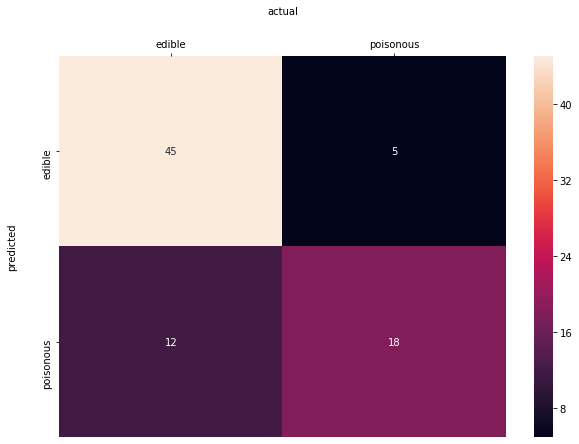

In [25]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
array = [[45,5],[12,18]]
df_cm = pd.DataFrame(array, columns=['edible', 'poisonous'], index=['edible', 'poisonous'])
# plt.xtitle('')
# plt.y
plt.figure(figsize = (10,7))
ax = sns.heatmap(df_cm, annot=True)
ax.xaxis.set_ticks_position('top')
ax.set(xlabel='actual', ylabel='predicted')
ax.yaxis.labelpad = 25
ax.xaxis.set_label_position('top') 
ax.xaxis.labelpad = 25
plt.savefig("mushrooms_confusion_matrix.png")

Text(0.5, 1, "Anscombe's quartet")

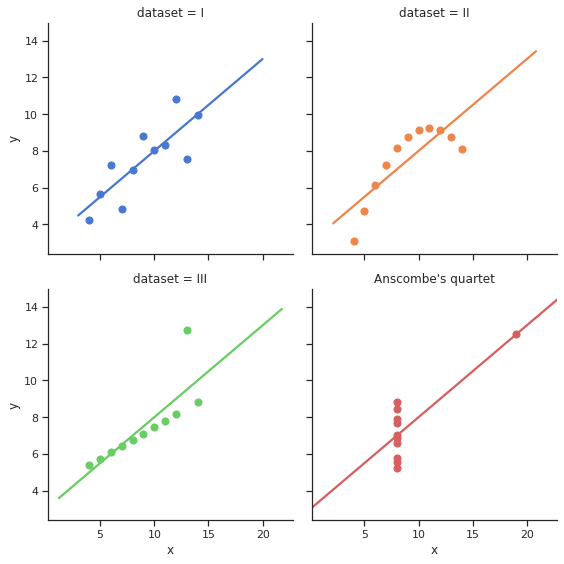

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
ax = sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1});

plt.title("Anscombe's quartet")


In [2]:
df.groupby('dataset').agg(['mean', 'median', 'std'])

x                          y                 
        mean median       std      mean median       std
dataset                                                 
I        9.0    9.0  3.316625  7.500909   7.58  2.031568
II       9.0    9.0  3.316625  7.500909   8.14  2.031657
III      9.0    9.0  3.316625  7.500000   7.11  2.030424
IV       9.0    8.0  3.316625  7.500909   7.04  2.030579

In [7]:
df.groupby('dataset').agg(['mean', 'median', 'std']).to_markdown()

"| dataset   |   ('x', 'mean') |   ('x', 'median') |   ('x', 'std') |   ('y', 'mean') |   ('y', 'median') |   ('y', 'std') |\n|:----------|----------------:|------------------:|---------------:|----------------:|------------------:|---------------:|\n| I         |               9 |                 9 |        3.31662 |         7.50091 |              7.58 |        2.03157 |\n| II        |               9 |                 9 |        3.31662 |         7.50091 |              8.14 |        2.03166 |\n| III       |               9 |                 9 |        3.31662 |         7.5     |              7.11 |        2.03042 |\n| IV        |               9 |                 8 |        3.31662 |         7.50091 |              7.04 |        2.03058 |"

In [4]:
df.groupby('dataset')[["x", "y"]].corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

In [5]:
import pandas as pd
import statsmodels.api as sm 

def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params


#This is what you need
df.groupby('dataset').apply(regress, 'y', ['x'])

,x,intercept
dataset,,
I,0.500091,3.000091
II,0.500000,3.000909
III,0.499727,3.002455
IV,0.499909,3.001727
